In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls '/content/drive/My Drive/4º Curso/DeepLearning/DeepLearningLabs/Lab4/Publish/'
myDrive = '/content/drive/My Drive/4º Curso/DeepLearning/DeepLearningLabs/Lab4/Publish/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access '/content/drive/My Drive/4º Curso/DeepLearning/DeepLearningLabs/Lab4/Publish/': No such file or directory


In [91]:
import glob

all_filenames = glob.glob('/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/*.txt')
print(all_filenames)

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
print(n_letters)

# Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicode_to_ascii('Ślusàrski'))
#print(all_letters)


['/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/Korean.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/Japanese.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/Greek.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/Irish.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/French.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/Vietnamese.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/Portuguese.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/German.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/Arabic.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/Chinese.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/Russian.txt', '/content/drive/My Drive/DeepLearningLabs/Lab4/Publish/data/names/Italian.txt', '/content/drive/My Drive/DeepLearningLab

In [92]:
# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []
# The labels have to be in a vector like this one '[0,...,NumberOfClasses - 1]'
#categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename).read().strip().split('\n')
    return [unicode_to_ascii(line) for line in lines]

for filename in all_filenames:
    category = filename.split('/')[-1].split('.')[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print('n_categories =', n_categories)

print(category_lines['Italian'][:5])
#print(categories)

#for key in category_lines.keys():
  #print(key)

n_categories = 18
['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [93]:
import torch
import torch.nn as nn
from torch.autograd import Variable
device = "cuda" if torch.cuda.is_available else "device"

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letter_to_tensor(letter):
    tensor = torch.zeros(1, n_letters)
    letter_index = all_letters.find(letter)
    tensor[0][letter_index] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def line_to_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        letter_index = all_letters.find(letter)
        tensor[li][0][letter_index] = 1
    return tensor

print(letter_to_tensor('M'))
print(letter_to_tensor('M').size())
print(line_to_tensor('Jones'))
print(line_to_tensor('Jones').size())


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([1, 57])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.

!Main Task, define two model of RNN and LSTM. 
!Remember to use nn.RNN and nn.LSTM on internal 
!definition of each RNN and LSTM class. 
    


In [0]:
class RNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RNN, self).__init__()
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        self.i2h = nn.Linear(input_dim + hidden_dim, hidden_dim)
        self.i2o = nn.Linear(input_dim + hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax()

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 2)
        combined = combined.view(1, -1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        
        return output, hidden.unsqueeze(0)
      
    def init_hidden(self):
        return Variable(torch.zeros(1, self.hidden_dim)).unsqueeze(0).to(device)

In [0]:
class RNN_FCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RNN_FCN, self).__init__()
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax()

    def forward(self, input, hidden):
        output, hidden = self.rnn(input, hidden)
        output = output.view(1, -1)
        output = self.fc(output)
        output = self.softmax(output)
        
        return output, hidden
      
    def init_hidden(self):
        return Variable(torch.zeros(1, self.hidden_dim)).unsqueeze(0).to(device)

In [0]:
class LSTM_FCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTM_FCN, self).__init__()
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax()

    def forward(self, input, hidden):
        output, hidden = self.lstm(input, hidden)
        output = output.view(1, -1)
        output = self.fc(output)
        output = self.softmax(output)
        
        return output, hidden
      
    def init_hidden(self):
        return (Variable(torch.zeros(1, self.hidden_dim)).unsqueeze(0).to(device), Variable(torch.zeros(1, self.hidden_dim)).unsqueeze(0).to(device))

In [0]:
n_hidden = 256

# model = RNN(n_letters, n_hidden, n_categories).to(device)
model = RNN_FCN(n_letters, n_hidden, n_categories).to(device)
# model = LSTM_FCN(n_letters, n_hidden, n_categories).to(device)


In [166]:
n_epochs = 200000

criterion = nn.NLLLoss()

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# letter to tensor
input = letter_to_tensor('A').unsqueeze(0).to(device)
hidden = model.init_hidden()
output, next_hidden = model(input, hidden)
print("OUTPUT", output)

OUTPUT tensor([[-2.9038, -2.9071, -2.8977, -2.8435, -2.9311, -2.9354, -2.9271, -2.8366,
         -2.8976, -2.9252, -2.9373, -2.8489, -2.8977, -2.8416, -2.9153, -2.8924,
         -2.8509, -2.8487]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [167]:
def category_from_output(output):
    top_n, top_i = output.data.topk(1) # Tensor out of Variable with .data
    category_i = top_i[0][0]
    return all_categories[category_i], category_i

print(category_from_output(output))

('German', tensor(7, device='cuda:0'))


In [0]:
import random

def random_training_pair():                                                                                                               
    category = random.choice(all_categories)
    #print(category)
    line = random.choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long).to(device)
    #print(category_tensor)
    line_tensor = line_to_tensor(line).to(device)
    return category, line, category_tensor, line_tensor

#for i in range(10):
    #category, line, category_tensor, line_tensor = random_training_pair()
    #print('category =', category, '/ line =', line)

In [0]:
import time
import math

print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


In [170]:
start = time.time()

current_loss = 0
all_losses = []

for epoch in range(n_epochs):
  # Clear gradients
  optimizer.zero_grad()
  
  category, line, category_tensor, line_tensor = random_training_pair()
  
  model.zero_grad()
  hidden = model.init_hidden()
  
  for i in range(line_tensor.size(0)):
      output, hidden = model(line_tensor[i].unsqueeze(0), hidden)
      #print(output.shape, hidden.shape)
  
#   print(output.size())
#   print(category_tensor.size())
#   break
  loss = criterion(output, category_tensor)
  loss.backward()
  optimizer.step()
  
  current_loss += loss
  
#   print(output)

  # Print epoch number, loss, name and guess
  if epoch % print_every == 0:
      guess, guess_i = category_from_output(output)
      correct = '✓' if guess == category else '✗ (%s)' % category
      print('%d %d%% (%s) %.4f %s / %s %s' % (epoch, epoch / n_epochs * 100, time_since(start), loss, line, guess, correct))

  # Add current loss avg to list of losses
  if epoch % plot_every == 0:
      all_losses.append(current_loss / plot_every)
      current_loss = 0

  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


0 0% (0m 0s) 2.8592 Turchi / English ✗ (Italian)
5000 2% (0m 22s) 2.2828 Jebson / Irish ✗ (English)
10000 5% (0m 45s) 2.6464 Bonner / German ✗ (French)
15000 7% (1m 7s) 3.3102 Dziedzic / Russian ✗ (Polish)
20000 10% (1m 30s) 0.7587 Chau / Vietnamese ✓
25000 12% (1m 54s) 3.4357 Aitken / Dutch ✗ (Scottish)
30000 15% (2m 16s) 0.9517 Davlertgareev / Russian ✓
35000 17% (2m 38s) 1.2229 Caiazzo / Portuguese ✗ (Italian)
40000 20% (3m 0s) 1.6354 Duchamps / English ✗ (French)
45000 22% (3m 24s) 1.2653 Ron / Korean ✓
50000 25% (3m 46s) 0.5497 Pena / Spanish ✓
55000 27% (4m 8s) 0.8065 Barros / Portuguese ✓
60000 30% (4m 31s) 0.4016 Pereira / Portuguese ✓
65000 32% (4m 53s) 0.0204 Winogrodzki / Polish ✓
70000 35% (5m 17s) 0.0077 Emohonov / Russian ✓
75000 37% (5m 39s) 0.6543 Almeida / Portuguese ✓
80000 40% (6m 3s) 1.5160 Sarkis / Greek ✗ (Arabic)
85000 42% (6m 25s) 0.1363 Wojda / Polish ✓
90000 45% (6m 47s) 0.3880 Mackay / Scottish ✓
95000 47% (7m 11s) 0.1107 Shim / Korean ✓
100000 50% (7m 33s) 0

KeyboardInterrupt: ignored

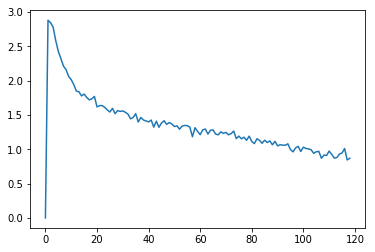

In [171]:
import matplotlib.pyplot as plt 
plt.plot(all_losses)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


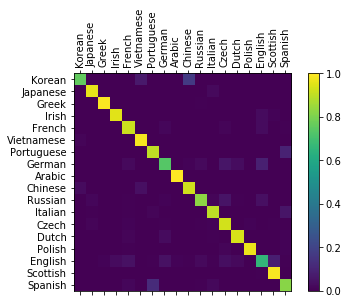

In [144]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = model.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i].unsqueeze(0), hidden)
    
    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = random_training_pair()
    output = evaluate(line_tensor)
    guess, guess_i = category_from_output(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

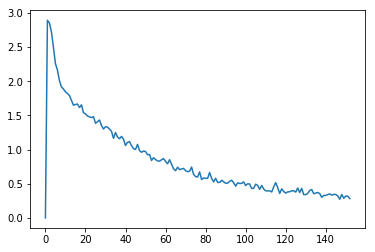


> Dovesky
tensor([-0.5469, -0.8672, -7.0055], device='cuda:0')
(-0.55) Russian
(-0.87) Czech
(-7.01) English

> Jackson
tensor([-0.0271, -3.6742, -7.0291], device='cuda:0')
(-0.03) Scottish
(-3.67) English
(-7.03) Czech

> Satoshi
tensor([-3.7422e-03, -6.4958e+00, -6.7050e+00], device='cuda:0')
(-0.00) Japanese
(-6.50) Arabic
(-6.70) Czech


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [145]:
plt.figure()
plt.plot(all_losses)
plt.show()

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    output = evaluate(line_to_tensor(input_line).to(device))

    # Get top N categories
    topv, topi = output[0].data.topk(n_predictions, 0, True)
    predictions = []
    print(topv)
    for i in range(n_predictions):
      
        value = topv[i].data.cpu().item()
        #print(value)
        category = topi[i].data.cpu()
        category_index = category.item()
        print('(%.2f) %s' % (value, all_categories[category_index]))
        predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')